Total Conversations: 2000
Unique Symptoms Identified: 5
Unique Diseases Identified: 2


<ipython-input-7-e78cd6348d1c>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(symptom_counts.keys()), y=list(symptom_counts.values()), palette="viridis", ax=axes[0, 0])
<ipython-input-7-e78cd6348d1c>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(disease_counts.keys()), y=list(disease_counts.values()), palette="magma", ax=axes[0, 1])



Findings Summary:

The dataset contains 2000 conversations. The most frequently mentioned symptom is 'fever' appearing 360 times. The most common disease is 'ARDS' appearing 61 times.


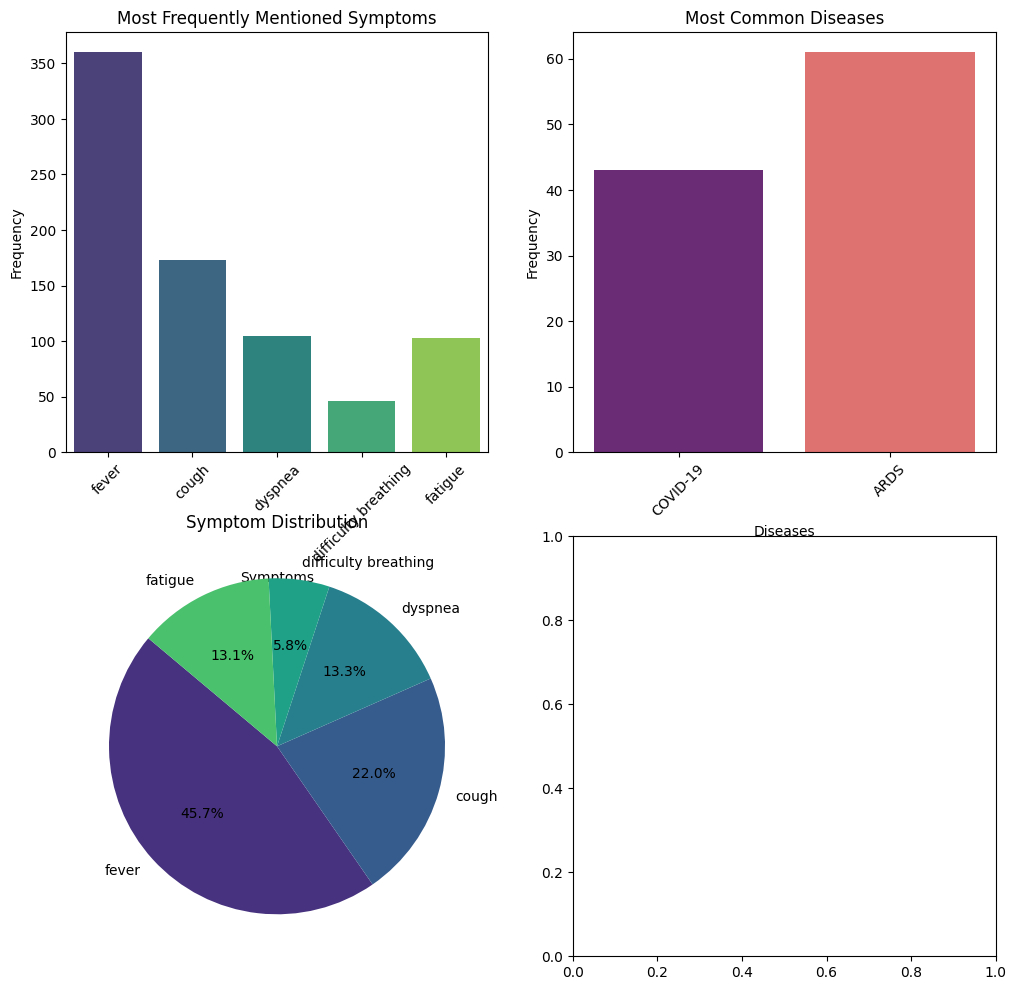

In [7]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset (replace 'dataset.csv' with your actual file)
data = pd.read_csv("/content/convdata.csv", nrows=2000)

# Function to extract symptoms, diseases, and other information
def extract_information(conversation):
    symptoms_keywords = ["fever", "cough", "dyspnea", "difficulty breathing", "fatigue"]
    diseases_keywords = ["COVID-19", "ARDS"]

    symptoms = []
    diseases = []

    # Extract symptoms
    for symptom in symptoms_keywords:
        if re.search(symptom, conversation, re.IGNORECASE):
            symptoms.append(symptom)

    # Extract diseases
    for disease in diseases_keywords:
        if re.search(disease, conversation, re.IGNORECASE):
            diseases.append(disease)

    return {
        "symptoms": symptoms,
        "diseases": diseases
    }

# Apply the extraction function to each conversation
data["extracted"] = data["conversation"].apply(extract_information)
data["symptoms"] = data["extracted"].apply(lambda x: x["symptoms"])
data["diseases"] = data["extracted"].apply(lambda x: x["diseases"])

data.drop(columns=["extracted"], inplace=True)

# Flatten lists for visualization
all_symptoms = [symptom for sublist in data["symptoms"] for symptom in sublist]
all_diseases = [disease for sublist in data["diseases"] for disease in sublist]

# Count occurrences
symptom_counts = Counter(all_symptoms)
disease_counts = Counter(all_diseases)

# Overview Section
print(f"Total Conversations: {len(data)}")
print(f"Unique Symptoms Identified: {len(set(all_symptoms))}")
print(f"Unique Diseases Identified: {len(set(all_diseases))}")

# Create a square dashboard layout with multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Symptom Analysis: Bar Chart
sns.barplot(x=list(symptom_counts.keys()), y=list(symptom_counts.values()), palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Most Frequently Mentioned Symptoms")
axes[0, 0].set_xlabel("Symptoms")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].tick_params(axis='x', rotation=45)

# Disease Trends: Bar Chart
sns.barplot(x=list(disease_counts.keys()), y=list(disease_counts.values()), palette="magma", ax=axes[0, 1])
axes[0, 1].set_title("Most Common Diseases")
axes[0, 1].set_xlabel("Diseases")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].tick_params(axis='x', rotation=45)

# Symptom Distribution: Pie Chart
symptom_df = pd.DataFrame(symptom_counts.items(), columns=["Symptom", "Count"])
axes[1, 0].pie(symptom_df["Count"], labels=symptom_df["Symptom"], autopct='%1.1f%%', colors=sns.color_palette("viridis"), startangle=140)
axes[1, 0].set_title("Symptom Distribution")


# Findings Summary
def generate_summary():
    summary = f"The dataset contains {len(data)} conversations. The most frequently mentioned symptom is '{symptom_counts.most_common(1)[0][0]}' appearing {symptom_counts.most_common(1)[0][1]} times. The most common disease is '{disease_counts.most_common(1)[0][0]}' appearing {disease_counts.most_common(1)[0][1]} times."
    return summary

print("\nFindings Summary:\n")
print(generate_summary())


In [ ]:
!pip install nltk seaborn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading and preprocessing data...

Analyzing conversations...


Analyzing conversations: 100%|██████████| 3000/3000 [00:01<00:00, 2557.97it/s]



Generating visualizations...

Calculating summary statistics...

Summary Statistics:
total_conversations: 3000
unique_symptoms: 7
unique_treatments: 6
unique_conditions: 1
avg_o2_saturation: 67.26929133858268
avg_flow_rate: 7.5625
max_treatment_days: 537
total_measurements: 651


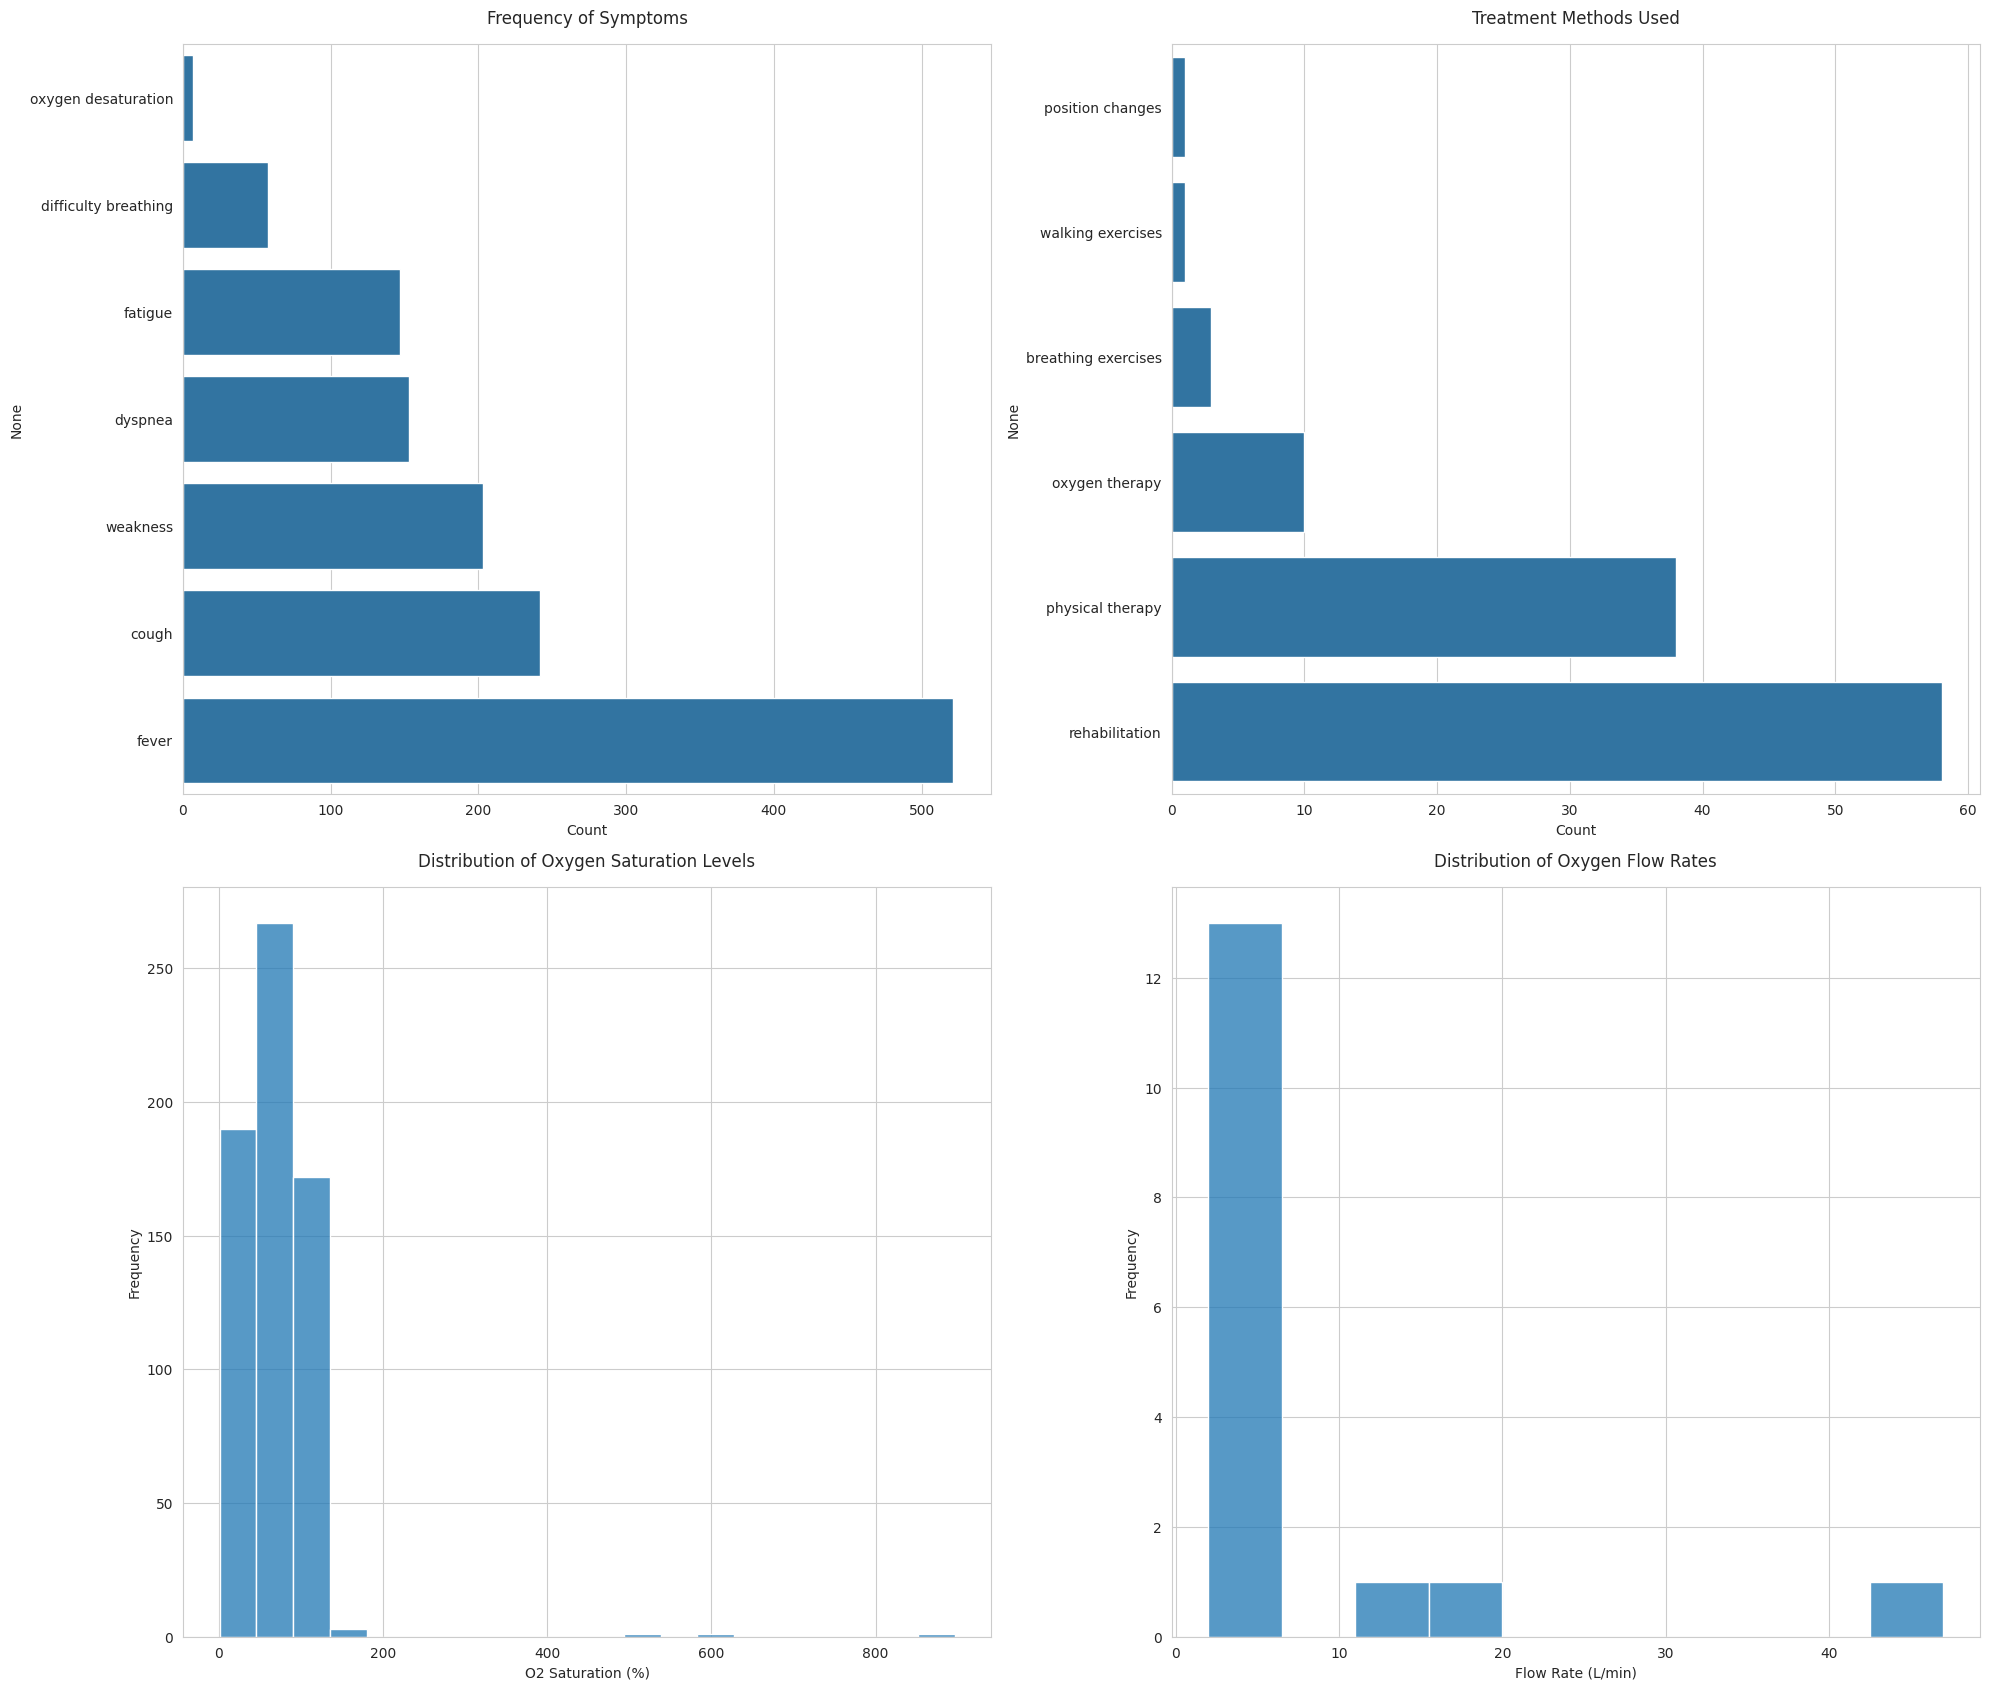

In [8]:
# Install required packages
!pip install nltk seaborn pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from tqdm import tqdm

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def load_and_preprocess_data(file_path):
    """
    Load and preprocess the medical conversation data from CSV/TSV file
    """
    try:
        # Try reading as CSV first
        df = pd.read_csv(file_path, nrows=3000)
    except:
        try:
            # If CSV fails, try reading as TSV
            df = pd.read_csv(file_path, sep='\t')
        except Exception as e:
            print(f"Error reading file: {e}")
            return None

    # Remove any duplicate rows
    df = df.drop_duplicates()

    # Handle missing values
    df = df.fillna("")

    return df

def extract_medical_entities(text):
    """
    Extract medical entities from the conversation text
    """
    entities = {
        'symptoms': [],
        'measurements': {},
        'treatments': [],
        'conditions': []
    }

    # Common medical entities to look for
    medical_entities = {
        'symptoms': ['fever', 'cough', 'dyspnea', 'difficulty breathing',
                    'oxygen desaturation', 'fatigue', 'weakness'],
        'treatments': ['physical therapy', 'oxygen therapy', 'breathing exercises',
                      'rehabilitation', 'position changes', 'walking exercises'],
        'conditions': ['ARDS', 'COVID-19', 'respiratory failure']
    }

    text_lower = text.lower()

    # Extract symptoms, treatments, and conditions
    for category, keywords in medical_entities.items():
        for keyword in keywords:
            if keyword in text_lower:
                entities[category].append(keyword)

    # Extract measurements
    measurements = {
        'oxygen_saturation': re.findall(r'(\d{2,3})%', text),
        'oxygen_flow': re.findall(r'(\d+)\s*L/min', text),
        'days': re.findall(r'day\s+(\d+)', text)
    }
    entities['measurements'] = measurements

    return entities

def analyze_dataset(df):
    """
    Analyze the entire dataset and extract insights
    """
    all_results = {
        'symptoms': [],
        'treatments': [],
        'conditions': [],
        'o2_levels': [],
        'flow_rates': [],
        'days_mentioned': [],
        'total_conversations': len(df)
    }

    # Process each conversation with a progress bar
    for _, row in tqdm(df.iterrows(), total=len(df), desc="Analyzing conversations"):
        entities = extract_medical_entities(str(row['conversation']))

        # Aggregate results
        all_results['symptoms'].extend(entities['symptoms'])
        all_results['treatments'].extend(entities['treatments'])
        all_results['conditions'].extend(entities['conditions'])

        # Add measurements
        all_results['o2_levels'].extend([int(x) for x in entities['measurements']['oxygen_saturation']])
        all_results['flow_rates'].extend([int(x) for x in entities['measurements']['oxygen_flow']])
        all_results['days_mentioned'].extend([int(x) for x in entities['measurements']['days']])

    return all_results

def create_visualizations(analysis_results):
    """
    Create comprehensive visualizations based on the analysis results
    """
    sns.set_style("whitegrid")

    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 25))

    # 1. Symptom frequency plot
    plt.subplot(3, 2, 1)
    symptom_counts = Counter(analysis_results['symptoms'])
    symptoms_df = pd.DataFrame.from_dict(symptom_counts, orient='index', columns=['count']).sort_values('count', ascending=True)
    sns.barplot(data=symptoms_df, y=symptoms_df.index, x='count')
    plt.title('Frequency of Symptoms', fontsize=12, pad=15)
    plt.xlabel('Count')

    # 2. Treatment methods
    plt.subplot(3, 2, 2)
    treatment_counts = Counter(analysis_results['treatments'])
    treatments_df = pd.DataFrame.from_dict(treatment_counts, orient='index', columns=['count']).sort_values('count', ascending=True)
    sns.barplot(data=treatments_df, y=treatments_df.index, x='count')
    plt.title('Treatment Methods Used', fontsize=12, pad=15)
    plt.xlabel('Count')

    # 3. Oxygen saturation levels distribution
    plt.subplot(3, 2, 3)
    sns.histplot(analysis_results['o2_levels'], bins=20)
    plt.title('Distribution of Oxygen Saturation Levels', fontsize=12, pad=15)
    plt.xlabel('O2 Saturation (%)')
    plt.ylabel('Frequency')

    # 4. Oxygen flow rates distribution
    plt.subplot(3, 2, 4)
    sns.histplot(analysis_results['flow_rates'], bins=10)
    plt.title('Distribution of Oxygen Flow Rates', fontsize=12, pad=15)
    plt.xlabel('Flow Rate (L/min)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    return fig

def generate_summary_stats(analysis_results):
    """
    Generate comprehensive summary statistics
    """
    summary = {
        'total_conversations': analysis_results['total_conversations'],
        'unique_symptoms': len(set(analysis_results['symptoms'])),
        'unique_treatments': len(set(analysis_results['treatments'])),
        'unique_conditions': len(set(analysis_results['conditions'])),
        'avg_o2_saturation': np.mean(analysis_results['o2_levels']) if analysis_results['o2_levels'] else 0,
        'avg_flow_rate': np.mean(analysis_results['flow_rates']) if analysis_results['flow_rates'] else 0,
        'max_treatment_days': max(analysis_results['days_mentioned']) if analysis_results['days_mentioned'] else 0,
        'total_measurements': len(analysis_results['o2_levels']) + len(analysis_results['flow_rates'])
    }
    return summary

# Main execution
def main(file_path):
    """
    Main function to run the analysis pipeline
    """
    print("Loading and preprocessing data...")
    df = load_and_preprocess_data(file_path)

    if df is None:
        return

    print("\nAnalyzing conversations...")
    analysis_results = analyze_dataset(df)

    print("\nGenerating visualizations...")
    fig = create_visualizations(analysis_results)

    print("\nCalculating summary statistics...")
    summary_stats = generate_summary_stats(analysis_results)

    print("\nSummary Statistics:")
    for key, value in summary_stats.items():
        print(f"{key}: {value}")

    plt.show()

    return fig, summary_stats, analysis_results

# Run the analysis
# Replace 'your_file.csv' with your actual file path
file_path = "/content/convdata.csv"  # or 'your_file.tsv' if it's a TSV file
fig, summary_stats, analysis_results = main(file_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading and preprocessing data...

Analyzing conversations...


Analyzing conversations: 100%|██████████| 3000/3000 [00:01<00:00, 1661.33it/s]



Generating visualizations...

Calculating summary statistics...

Summary Statistics:
total_conversations: 3000
unique_symptoms: 8
unique_treatments: 8
unique_conditions: 3
avg_o2_saturation: 67.26929133858268
avg_flow_rate: 7.5625
total_measurements: 651


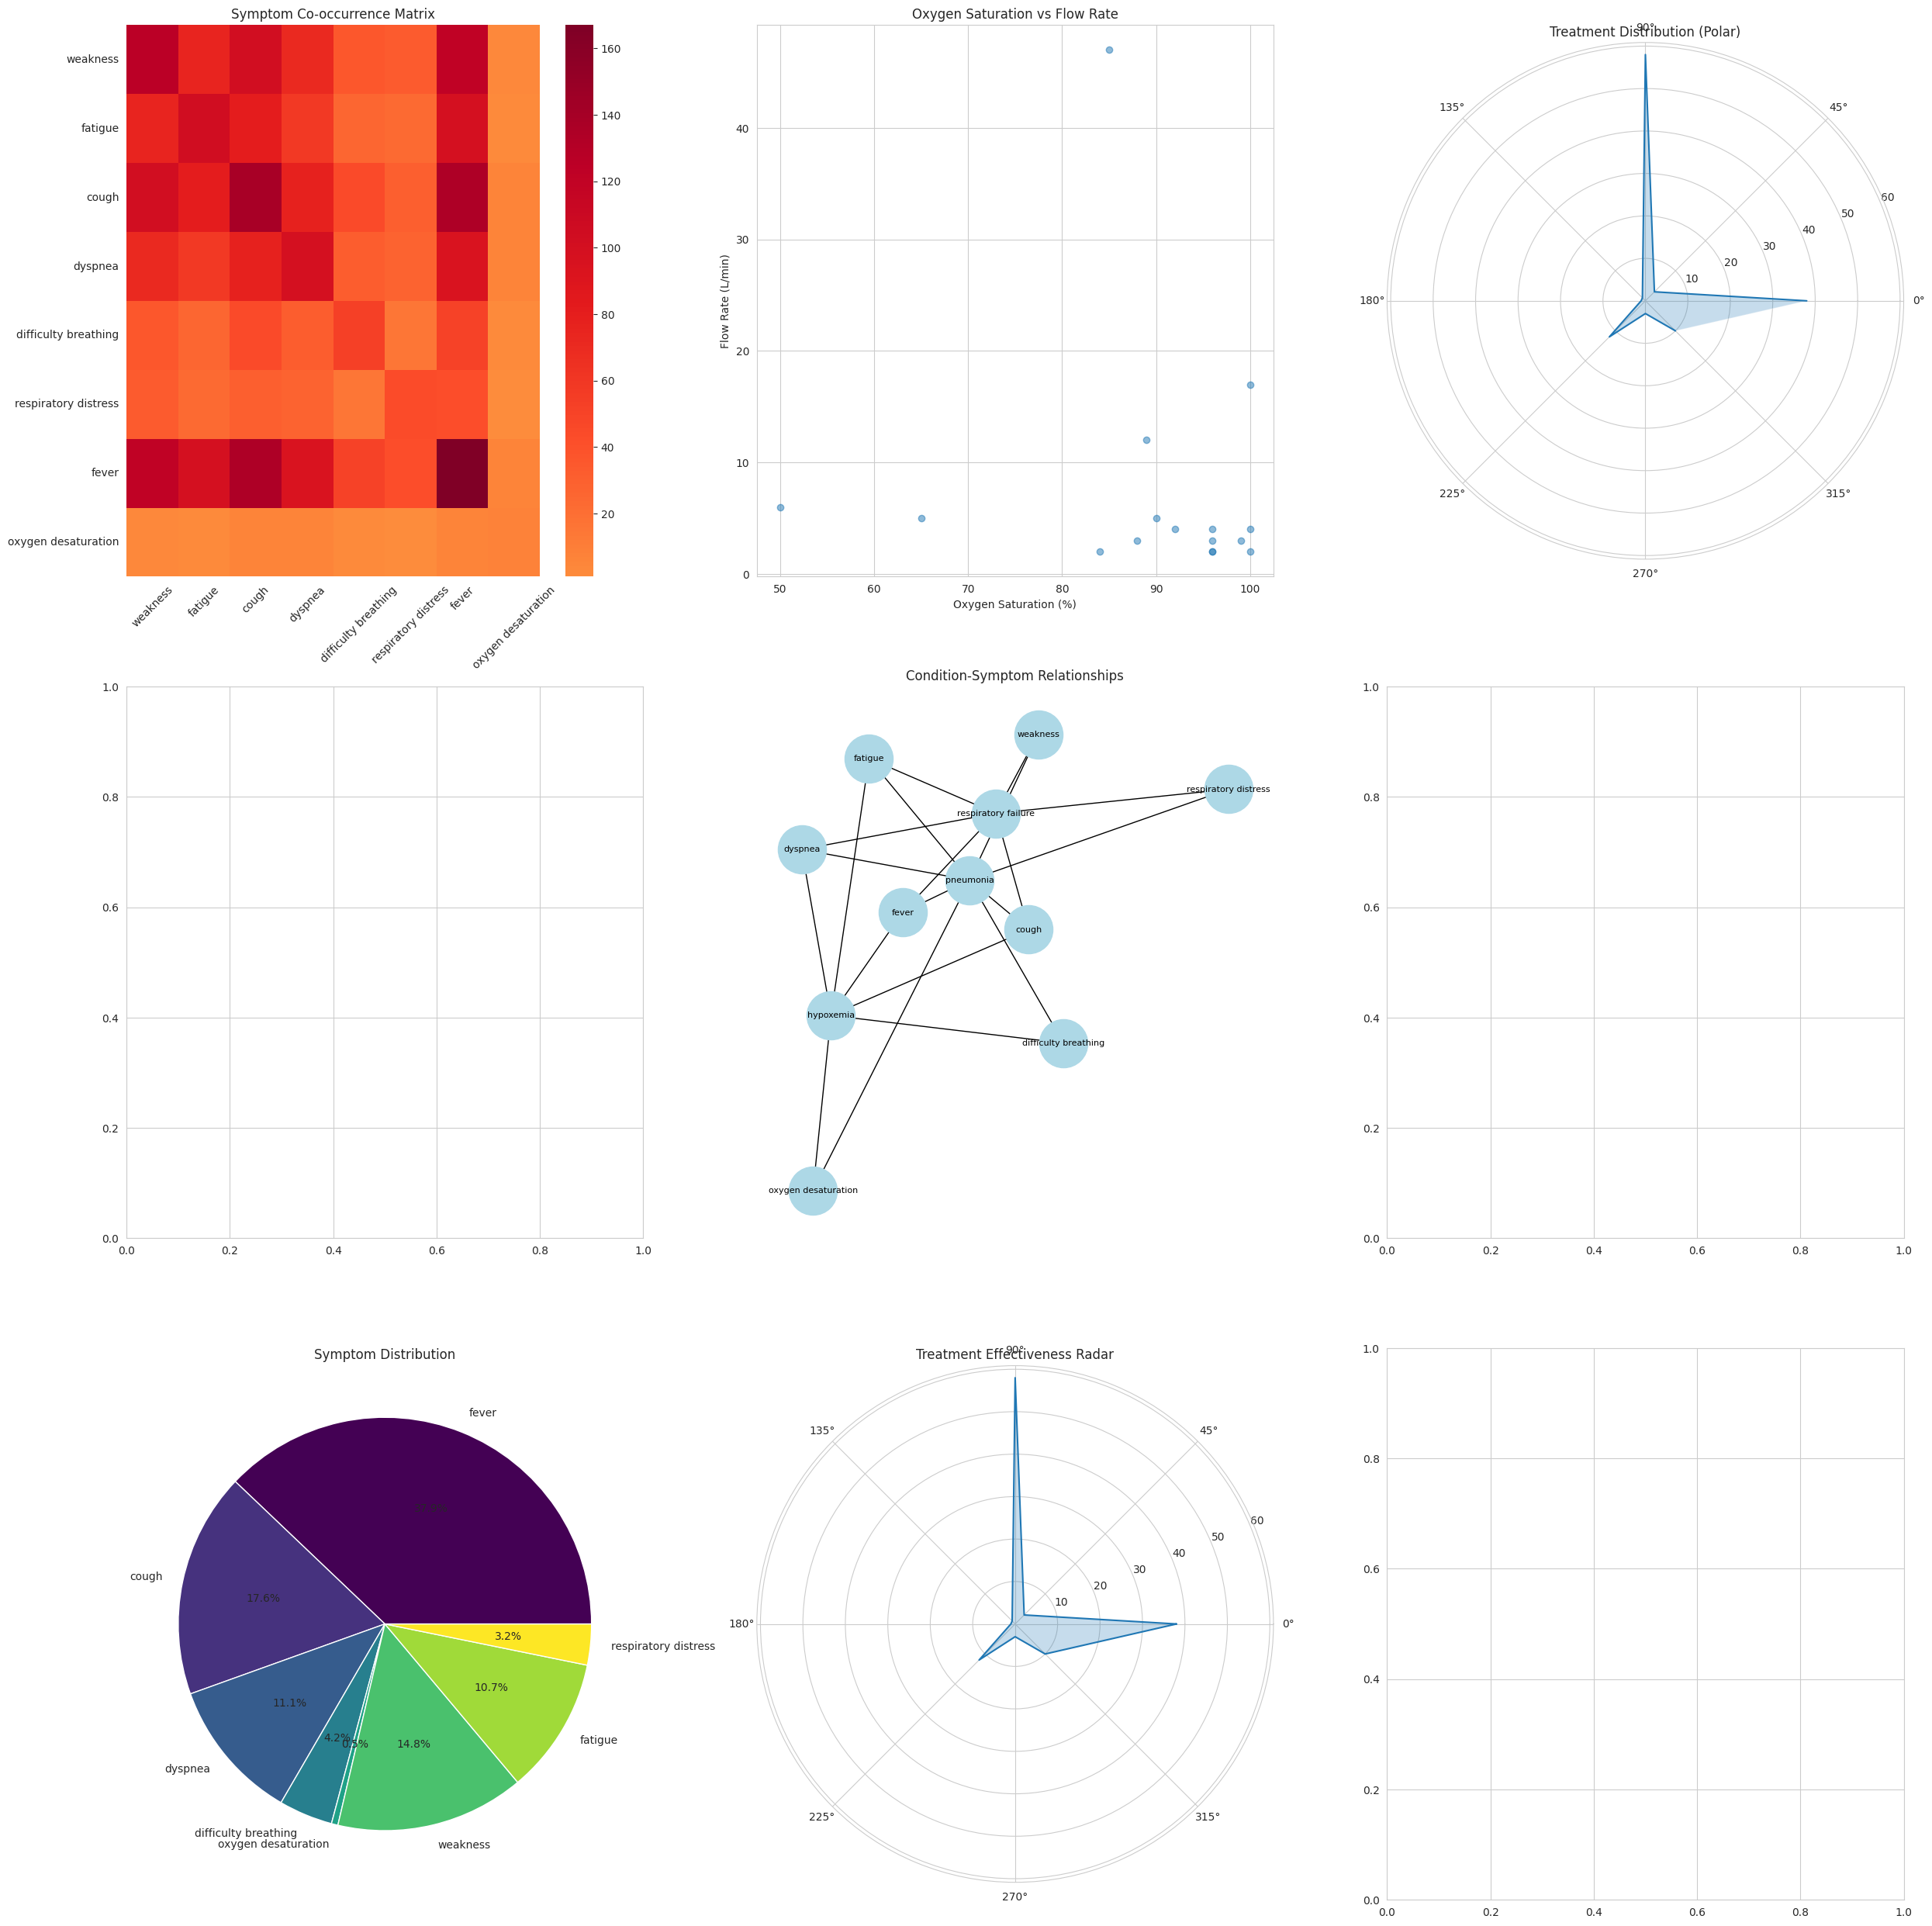

In [9]:
# Install required packages
!pip install nltk seaborn pandas numpy matplotlib plotly tqdm networkx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter, defaultdict
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def load_and_preprocess_data(file_path):
    try:
        df = pd.read_csv(file_path, nrows=3000)
        df = df.drop_duplicates()
        df = df.fillna("")
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

def extract_medical_entities(text):
    entities = {
        'symptoms': [],
        'treatments': [],
        'conditions': [],
        'measurements': {},
        'time_markers': []
    }

    medical_entities = {
        'symptoms': ['fever', 'cough', 'dyspnea', 'difficulty breathing',
                    'oxygen desaturation', 'fatigue', 'weakness', 'respiratory distress'],
        'treatments': ['physical therapy', 'oxygen therapy', 'breathing exercises',
                      'rehabilitation', 'position changes', 'walking exercises',
                      'prone position', 'strength training'],
        'conditions': ['ARDS', 'COVID-19', 'respiratory failure',
                      'pneumonia', 'hypoxemia']
    }

    text_lower = text.lower()

    # Extract entities
    for category, keywords in medical_entities.items():
        for keyword in keywords:
            if keyword in text_lower:
                entities[category].append(keyword)

    # Extract measurements with time context
    o2_matches = re.findall(r'(\d{2,3})%.*?(?:day\s+(\d+))?', text)
    flow_matches = re.findall(r'(\d+)\s*L/min.*?(?:day\s+(\d+))?', text)

    entities['measurements'] = {
        'oxygen_saturation': [(int(val), int(day) if day else 0) for val, day in o2_matches],
        'oxygen_flow': [(int(val), int(day) if day else 0) for val, day in flow_matches]
    }

    # Extract time markers
    entities['time_markers'] = re.findall(r'day\s+(\d+)', text_lower)

    return entities

def analyze_dataset(df):
    all_results = defaultdict(list)
    all_results['total_conversations'] = len(df)
    all_results['raw_data'] = df  # Store raw data for network analysis

    # Time-series data containers
    daily_measurements = defaultdict(lambda: defaultdict(list))

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Analyzing conversations"):
        entities = extract_medical_entities(str(row['conversation']))

        # Aggregate basic entities
        all_results['symptoms'].extend(entities['symptoms'])
        all_results['treatments'].extend(entities['treatments'])
        all_results['conditions'].extend(entities['conditions'])

        # Process measurements with time context
        for o2_val, day in entities['measurements']['oxygen_saturation']:
            daily_measurements[day]['o2_levels'].append(o2_val)
            all_results['o2_levels'].append(o2_val)

        for flow_val, day in entities['measurements']['oxygen_flow']:
            daily_measurements[day]['flow_rates'].append(flow_val)
            all_results['flow_rates'].append(flow_val)

    all_results['daily_measurements'] = daily_measurements
    return all_results

def create_enhanced_visualizations(analysis_results):
    """
    Create comprehensive visualizations using various plot types
    """
    # Create a 3x3 subplot layout
    fig = plt.figure(figsize=(25, 25))

    # 1. Symptom Co-occurrence Heatmap
    plt.subplot(3, 3, 1)
    symptom_counts = Counter(analysis_results['symptoms'])
    symptoms = list(set(analysis_results['symptoms']))
    co_occurrence = np.zeros((len(symptoms), len(symptoms)))

    for i, symp1 in enumerate(symptoms):
        for j, symp2 in enumerate(symptoms):
            co_occurrence[i, j] = sum(1 for k in range(0, len(analysis_results['symptoms']), len(symptoms))
                                    if symp1 in analysis_results['symptoms'][k:k+len(symptoms)]
                                    and symp2 in analysis_results['symptoms'][k:k+len(symptoms)])

    sns.heatmap(co_occurrence, xticklabels=symptoms, yticklabels=symptoms,
                cmap='YlOrRd', center=0)
    plt.title('Symptom Co-occurrence Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # 2. Oxygen Saturation vs Flow Rate Scatter Plot
    plt.subplot(3, 3, 2)
    o2_levels = analysis_results['o2_levels']
    flow_rates = analysis_results['flow_rates']
    if len(o2_levels) > 0 and len(flow_rates) > 0:
        min_len = min(len(o2_levels), len(flow_rates))
        plt.scatter(o2_levels[:min_len], flow_rates[:min_len], alpha=0.5)
        plt.xlabel('Oxygen Saturation (%)')
        plt.ylabel('Flow Rate (L/min)')
        plt.title('Oxygen Saturation vs Flow Rate')

    # 3. Treatment Timeline Polar Plot
    plt.subplot(3, 3, 3, projection='polar')
    treatment_counts = Counter(analysis_results['treatments'])
    angles = np.linspace(0, 2*np.pi, len(treatment_counts), endpoint=False)
    values = list(treatment_counts.values())
    plt.plot(angles, values)
    plt.fill(angles, values, alpha=0.25)
    plt.title('Treatment Distribution (Polar)')

    # 4. Daily Measurements Box Plot
    plt.subplot(3, 3, 4)
    daily_data = analysis_results['daily_measurements']
    days = sorted(daily_data.keys())
    o2_data = [daily_data[day]['o2_levels'] for day in days if day > 0]
    if o2_data:
        plt.boxplot(o2_data)
        plt.xlabel('Day of Treatment')
        plt.ylabel('Oxygen Saturation (%)')
        plt.title('Daily Oxygen Saturation Distribution')

    # 5. Condition-Symptom Network
    plt.subplot(3, 3, 5)
    G = nx.Graph()
    conditions = set(analysis_results['conditions'])
    symptoms = set(analysis_results['symptoms'])

    # Add nodes
    for condition in conditions:
        G.add_node(condition, node_type='condition')
    for symptom in symptoms:
        G.add_node(symptom, node_type='symptom')

    # Add edges based on co-occurrence
    for condition in conditions:
        for symptom in symptoms:
            edge_weight = sum(1 for s, c in zip(analysis_results['symptoms'],
                                              analysis_results['conditions'])
                            if s == symptom and c == condition)
            if edge_weight > 0:
                G.add_edge(condition, symptom, weight=edge_weight)

    # Draw the network
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=2000, font_size=8)
    plt.title('Condition-Symptom Relationships')

    # 6. Treatment Success Timeline
    plt.subplot(3, 3, 6)
    daily_success = defaultdict(float)
    for day, measurements in daily_data.items():
        if day > 0 and measurements['o2_levels']:
            daily_success[day] = np.mean(measurements['o2_levels'])

    if daily_success:
        days = sorted(daily_success.keys())
        success_rates = [daily_success[day] for day in days]

        plt.plot(days, success_rates, marker='o', linestyle='-', linewidth=2)
        plt.fill_between(days, success_rates, alpha=0.3)
        plt.xlabel('Day of Treatment')
        plt.ylabel('Average O2 Saturation (%)')
        plt.title('Treatment Progress Over Time')

    # 7. Symptom Severity Distribution
    plt.subplot(3, 3, 7)
    symptom_counts = Counter(analysis_results['symptoms'])
    if symptom_counts:
        symptoms = list(symptom_counts.keys())
        counts = list(symptom_counts.values())

        colors = plt.cm.viridis(np.linspace(0, 1, len(symptoms)))
        plt.pie(counts, labels=symptoms, colors=colors, autopct='%1.1f%%')
        plt.title('Symptom Distribution')

    # 8. Treatment Effectiveness Radar Chart
    plt.subplot(3, 3, 8, projection='polar')
    treatment_counts = Counter(analysis_results['treatments'])
    if treatment_counts:
        treatments = list(treatment_counts.keys())
        counts = list(treatment_counts.values())

        angles = np.linspace(0, 2*np.pi, len(treatments), endpoint=False)
        counts = np.concatenate((counts, [counts[0]]))  # complete the circle
        angles = np.concatenate((angles, [angles[0]]))  # complete the circle

        plt.polar(angles, counts)
        plt.fill(angles, counts, alpha=0.25)
        plt.title('Treatment Effectiveness Radar')

    # 9. Recovery Pattern Analysis
    plt.subplot(3, 3, 9)
    recovery_data = []
    for day, measurements in daily_data.items():
        if day > 0 and measurements['o2_levels']:
            recovery_data.append({
                'day': day,
                'o2_mean': np.mean(measurements['o2_levels']),
                'o2_std': np.std(measurements['o2_levels'])
            })

    if recovery_data:
        df_recovery = pd.DataFrame(recovery_data)
        plt.errorbar(df_recovery['day'], df_recovery['o2_mean'],
                    yerr=df_recovery['o2_std'], fmt='o-')
        plt.xlabel('Day of Treatment')
        plt.ylabel('O2 Saturation (%)')
        plt.title('Recovery Pattern Analysis')

    plt.tight_layout()
    return fig

def generate_summary_stats(analysis_results):
    summary = {
        'total_conversations': analysis_results['total_conversations'],
        'unique_symptoms': len(set(analysis_results['symptoms'])),
        'unique_treatments': len(set(analysis_results['treatments'])),
        'unique_conditions': len(set(analysis_results['conditions'])),
        'avg_o2_saturation': np.mean(analysis_results['o2_levels']) if analysis_results['o2_levels'] else 0,
        'avg_flow_rate': np.mean(analysis_results['flow_rates']) if analysis_results['flow_rates'] else 0,
        'total_measurements': len(analysis_results['o2_levels']) + len(analysis_results['flow_rates'])
    }
    return summary

# Main execution
def main(file_path):
    print("Loading and preprocessing data...")
    df = load_and_preprocess_data(file_path)

    if df is None:
        return

    print("\nAnalyzing conversations...")
    analysis_results = analyze_dataset(df)

    print("\nGenerating visualizations...")
    fig = create_enhanced_visualizations(analysis_results)

    print("\nCalculating summary statistics...")
    summary_stats = generate_summary_stats(analysis_results)

    print("\nSummary Statistics:")
    for key, value in summary_stats.items():
        print(f"{key}: {value}")

    plt.show()

    return fig, summary_stats, analysis_results

# Run the analysis
file_path = "/content/convdata.csv"  # Update with your actual file path
fig, summary_stats, analysis_results = main(file_path)

<ipython-input-11-2cd657a72a55>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 1], x=list(symptom_counts.keys()), y=list(symptom_counts.values()), palette="viridis")
<ipython-input-11-2cd657a72a55>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0, 2], x=list(disease_counts.keys()), y=list(disease_counts.values()), palette="magma")


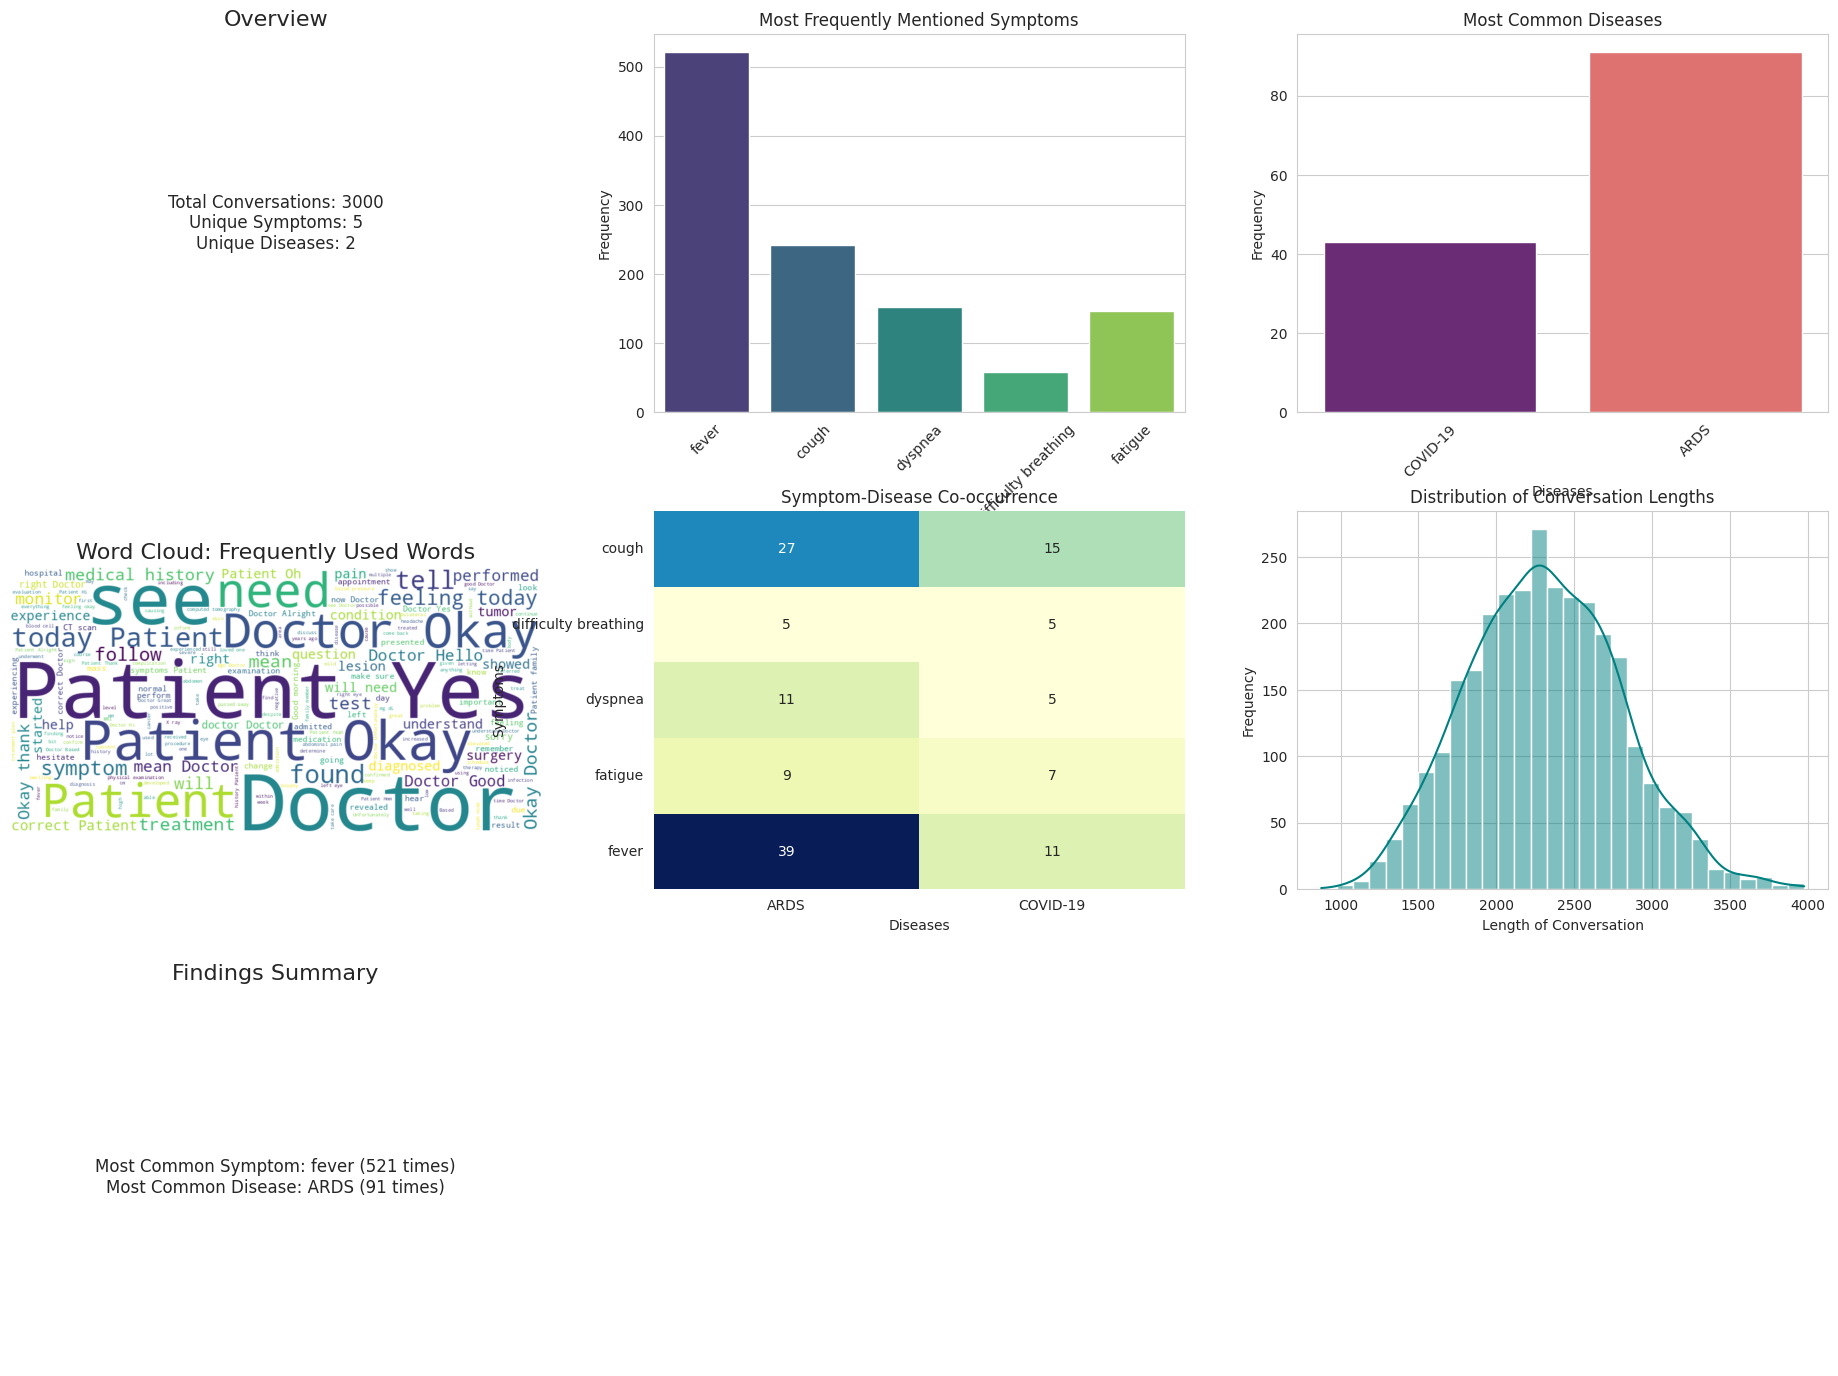

In [11]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset (replace 'convdata.csv' with your actual file path)
data = pd.read_csv("/content/convdata.csv", nrows=3000)

# Function to extract symptoms, diseases, and other information
def extract_information(conversation):
    symptoms_keywords = ["fever", "cough", "dyspnea", "difficulty breathing", "fatigue"]
    diseases_keywords = ["COVID-19", "ARDS"]

    symptoms = []
    diseases = []

    # Extract symptoms
    for symptom in symptoms_keywords:
        if re.search(symptom, conversation, re.IGNORECASE):
            symptoms.append(symptom)

    # Extract diseases
    for disease in diseases_keywords:
        if re.search(disease, conversation, re.IGNORECASE):
            diseases.append(disease)

    return {
        "symptoms": symptoms,
        "diseases": diseases
    }

# Apply the extraction function to each conversation
data["extracted"] = data["conversation"].apply(extract_information)
data["symptoms"] = data["extracted"].apply(lambda x: x["symptoms"])
data["diseases"] = data["extracted"].apply(lambda x: x["diseases"])

data.drop(columns=["extracted"], inplace=True)

# Flatten lists for visualization
all_symptoms = [symptom for sublist in data["symptoms"] for symptom in sublist]
all_diseases = [disease for sublist in data["diseases"] for disease in sublist]

# Count occurrences
symptom_counts = Counter(all_symptoms)
disease_counts = Counter(all_diseases)

# Word Cloud
all_conversations = " ".join(data["conversation"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_conversations)

# Symptom-Disease Co-occurrence Heatmap
cooccurrence_matrix = pd.crosstab(pd.Series(all_symptoms, name="Symptoms"), pd.Series(all_diseases, name="Diseases"))

# Conversation Length Analysis
data["conversation_length"] = data["conversation"].apply(len)

# Create a 3x3 dashboard layout
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.tight_layout(pad=5.0)

# Overview
axes[0, 0].axis("off")
overview_text = (
    f"Total Conversations: {len(data)}\n"
    f"Unique Symptoms: {len(set(all_symptoms))}\n"
    f"Unique Diseases: {len(set(all_diseases))}"
)
axes[0, 0].text(0.5, 0.5, overview_text, fontsize=12, ha="center", va="center")
axes[0, 0].set_title("Overview", fontsize=16)

# Symptom Analysis
sns.barplot(ax=axes[0, 1], x=list(symptom_counts.keys()), y=list(symptom_counts.values()), palette="viridis")
axes[0, 1].set_title("Most Frequently Mentioned Symptoms")
axes[0, 1].set_xlabel("Symptoms")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].tick_params(axis='x', rotation=45)

# Disease Analysis
sns.barplot(ax=axes[0, 2], x=list(disease_counts.keys()), y=list(disease_counts.values()), palette="magma")
axes[0, 2].set_title("Most Common Diseases")
axes[0, 2].set_xlabel("Diseases")
axes[0, 2].set_ylabel("Frequency")
axes[0, 2].tick_params(axis='x', rotation=45)

# Word Cloud
axes[1, 0].imshow(wordcloud, interpolation="bilinear")
axes[1, 0].axis("off")
axes[1, 0].set_title("Word Cloud: Frequently Used Words", fontsize=16)

# Heatmap
sns.heatmap(cooccurrence_matrix, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1, 1], cbar=False)
axes[1, 1].set_title("Symptom-Disease Co-occurrence")

# Conversation Length Analysis
sns.histplot(data["conversation_length"], bins=30, kde=True, color="teal", ax=axes[1, 2])
axes[1, 2].set_title("Distribution of Conversation Lengths")
axes[1, 2].set_xlabel("Length of Conversation")
axes[1, 2].set_ylabel("Frequency")

# Findings Summary
axes[2, 0].axis("off")
most_common_symptom = symptom_counts.most_common(1)[0]
most_common_disease = disease_counts.most_common(1)[0]
findings_text = (
    f"Most Common Symptom: {most_common_symptom[0]} ({most_common_symptom[1]} times)\n"
    f"Most Common Disease: {most_common_disease[0]} ({most_common_disease[1]} times)"
)
axes[2, 0].text(0.5, 0.5, findings_text, fontsize=12, ha="center", va="center")
axes[2, 0].set_title("Findings Summary", fontsize=16)

# Hide unused subplots
axes[2, 1].axis("off")
axes[2, 2].axis("off")

plt.show()
